# Picnic Hackathon 🥇✅💯
 **When great customer support meets data**


## Why the challenge? 👷‍♀️🏆
One of our core beliefs is to offer our customers the best support possible, by allowing them, for example, to send in pictures of defect products they wish to be reimbursed for. But processing these pictures is very time-consuming as it is all done manually.

## What is the challenge? 🔥📣
The challenge we propose is the following: As a first step in helping customer support, come up with a way of labeling every picture that comes in according to the product that is in the picture. To keep with the Picnic spirit, we encourage to be as innovative and creative with your solutions as possible.

## Dataset 📊🗒
To that end, we offer the following [dataset](https://drive.google.com/file/d/1XSoOCPpndRCUIzz2LyRH0y01q35J7mgC/view?usp=sharing) of pictures of defect items.

## Setting & Imports  🔨🔧

In The following cells we will import and setting up our enviroment.

In [0]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Fastai Library
import fastai
from fastai.vision import *
from fastai.vision.models import *
import torch

# Others
from pathlib import Path
import glob
from PIL import ImageFile
from google.colab import drive
import re

In [0]:
# making some settings.
np.random.seed(42)
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
# Accessing The Data via Google Drive.
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Make sure to setup the path to yours.
path_to_folder = 'gdrive/My Drive/Dataset/The Picnic Hackathon 2019/'
train_df = pd.read_csv(path_to_folder + "train.tsv",  sep='\t')
# Take look at the structure.
train_df.head()

In [8]:
# We will take off some images from the training process.
bananas = [66, 425, 751, 758, 913, 1517, 1555, 1633, 2175, 2860, 3116, 3473, 4104, 4713, 4862, 4983, 5416, 5431, 5436, 5671, 5690, 6106, 7022, 7141, 7154]
aspags = [599,1300]
potatos = [91, 131, 1184, 2998, 3373, 3397, 3653, 4599, 5718, 5918, 6646]
pudding = [734,1059,1203,1252,1788,2028,2161,2310,2597,2633,3448,3629,4151,4879,4928,5064,5662,5771,5970,5973,7016]
poultry = [200,2147,2337,2606,3003,5602,6932]
salad = [1519,1778,3088,3190,4609,5430,6707,6921,7127]
fresh_bread= [1405,1967,2775,3606]
fresh_herbs= [1419,3737]
pork = [699,982,3451,4408,5146,5644,5936,7057]
minced_meat = [2842,2920,3911,4442,5119,5405,5721,6607,7214]
nectarine = [839,1018,1465,2051,2773,3294,3295,3340,4679,5887,6735,6909]
kiwis = [183,477,501,681,2106,2348,3660,4090,4277,5538,6854]
lunch_deli = [730,1506,3024,3909,4101,5498]
milk = [1779,1854,2784,3797,4849,6910]
eggs = [2403,2729,2755,4946,4949,5200,5248,5908,6346,6665]
fish = [19,57,1685,2428,4992,6137,4748]
onion = [1490,2327,3231,6075,4127,5606,6208]
broccli = [395,1044,1317,1420,11575,2561,2929,3741,3945,4488,4902,5616,5643,5666,7028]
cheese = [1009,1026,4782,4892,5024,5133,5365,6394]
citrus = [183,560,694,2274,6050]
cucumber = [1135,1401,1865,2137,2386,3019,3558,3624,3740,3850,4097,4119,4206,4305,4319,4349,5179,5480,6272,6307]
pinapls = [573,1866,3885,5585,7048,7225]
prepacked_bread = [52,406,520,3535,4540,5219,5432,5847,6705,6882,7085]
bell = [128,276,388,1740,3285,5150,5915,6069,6114,6376,7017]
berries = [1379,1482,1725,2817,2883,3695,5094,5342,5401,5550,5635,6220]

# making them in one big list.
all_ = bananas + aspags + potatos + pudding + poultry + salad + fresh_bread + fresh_herbs + pork + minced_meat + nectarine + kiwis + lunch_deli + milk + eggs + fish + onion+ broccli +cheese+citrus+cucumber+pinapls+prepacked_bread+bell+berries

# searching their index in the dataframe.
serie = train_df['file'].values
index = []
for i, value in enumerate(serie):
    for j in all_:
        a = r"^"+str(j)+"\.."        
        if re.match(a,value):
            index.append(i)
            
# deleting files from the data frame.
train_df_new = train_df.drop(index)

print("The New Number of Images is : {}".format(len(train_df_new)))
print("The Past Number of Images is : {}".format(len(train_df)))

The New Number of Images is : 7015
The Past Number of Images is : 7258


In [0]:
# getting the count of each class
label_counts = train_df_new.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [0]:
# Defining The Model, Batch Size, size of the Images and path where the training Images are.
MODEL= densenet161
BATCH = 32
SIZE = 224
pathTrain = Path("gdrive/My Drive/train/")

## Loading The Images 🍌🍉🍓🥦🥑🍆🍔🥝🍍🍎🍒🥒🌽🥕🍞
In this section, we will make Data Augmentation Using get_transforms, it's really easy to use.

In [0]:
# defining Transformations for Image Augmentation.
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=300)

In [0]:
# Making Objet to hold all the images of training and validation, be sure to normalize them using imagenet stats.
data = ImageDataBunch.from_df(pathTrain, train_df_new, size= SIZE, bs = BATCH, ds_tfms = tfms).normalize(imagenet_stats)

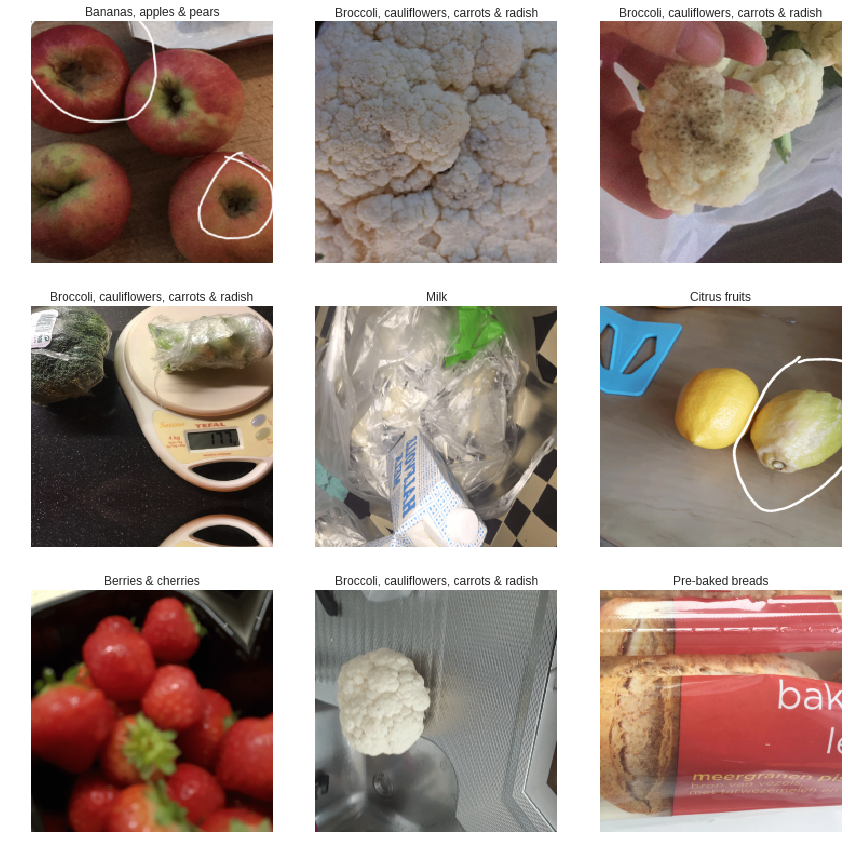

In [12]:
# show sample of images.
data.show_batch(rows=3, figsize=(12,12))

## Model Preparation 🔪🍳👨‍🍳
We will define some functions to use them later on, I've tried a lot of pre-trained model provided by the FastAi library like Resnet50,101 and 151, the VGG's and SqueezeNet, but the one which show great performance was the Densenet161.

In [0]:
from sklearn.metrics import f1_score

# Making Function to use it in metrics for the CNN.
def f1_macro_score(y_pred, y_true, tens=True):
    score = f1_score(y_true, np.argmax(y_pred, axis = 1), average = 'macro')
    if tens:
        score= tensor(score)
    else:
        score= score
    return score

# Function to calculate the F1-Score for validation data using Confusion Matrix.
def f1_from_cm(cm):
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = 25
    TN = []
    for i in range(num_classes):
      temp = np.delete(cm, i, 0)
      temp = np.delete(temp, i, 1)
      TN.append(sum(sum(temp)))
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2 * (precision.mean() * recall.mean()) / (precision.mean() + recall.mean())
    return F1

In [0]:
def performane_indiators(model):
    # Plotting some curves to see the performance.
    model.recorder.plot_losses()
    model.recorder.plot_metrics()
    model.recorder.plot()
    
    # Print confusion matrix, F1 score and top losses.
    result = ClassificationInterpretation.from_learner(model)
    result.plot_top_losses(9, figsize=(15,15) , heatmap = False)
    result.plot_confusion_matrix(figsize=(12,12), dpi = 50)
    print("F1-Score for validation is {}".format(f1_from_cm(result.confusion_matrix())))

In [15]:
# Making The CNN Model Using Our Images And Densenet161 Architeture.
model = cnn_learner(data, MODEL, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
115730790it [00:01, 90237390.67it/s]


## Model Training 🧗‍♂️🏋🎯
In this Section the Main work will happen, We will train our model using the OneCycle Policy implemented in the Fastai Library, first we freeze all the top layers and let only the final layer got trained, the we will unfreeze it to train the top layers.

In [0]:
# Fitting the model to data using OneCycle Policy.
model.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time


In [0]:
# show results.
performane_indiators(model)

In [0]:
model.save('stage-one')

In [0]:
# unfreeze the model to train top layers.
model.unfreeze()
# Fitting the unfrozzen model to data using OneCycle Policy.
model.fit_one_cycle(15)

In [0]:
# show result.
performane_indiators(model)

In [0]:
model.save('stage-two')

## Exporting Model 🚁💥
In this few finals cell, we will export the best stage model which got the best F1 score on the validtion set, to use it later for doing prediction on the test set.

In [0]:
# we will export the model which got the best result on validation set.
# in my case, the best was the stage-one.
model.load('stage-one')
model.export('densenet161_best_so_far.pkl')

In [0]:
print("Saved to path: {}".format(model.path))

# Conclusion 😀🎉🙋‍♂️

In this notebook the training of the CNN was done, to get the final result we've made another notebook Called __The Picnic Vision - Submission__, and it can be found on the same repository or via this [link](https://github.com/Younes-Charfaoui/Picnic-Hackathon/blob/master/The%20Picnic%20Vision%20-%20Submission.ipynb).

